Aperçu des données chargées :
      Marque   Prix  Consommation  Performances  Fiabilité  Confort  Design  \
0     Toyota  23850            29             8          9        8       7   
1      Honda  27064            33             7          8        9       8   
2       Ford  27435            25             6          7        7       7   
3  Chevrolet  29982            28             7          8        8       6   
4    Hyundai  26547            29             6          8        9       8   

   Espace Intérieur  Technologie  Sécurité Transmission  ID  
0                 8            8         9  Automatique   1  
1                 9            9         8     Manuelle   2  
2                 8            7         7  Automatique   3  
3                 7            6         8  Automatique   4  
4                 8            8         8     Manuelle   5  
Normalisation des données:
               Prix  Consommation  Performances  Fiabilité   Confort  Design  \
Marque          

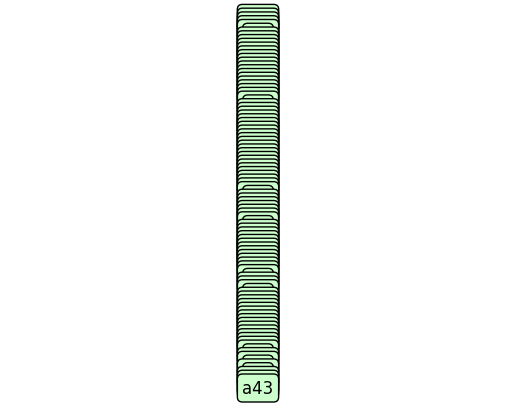

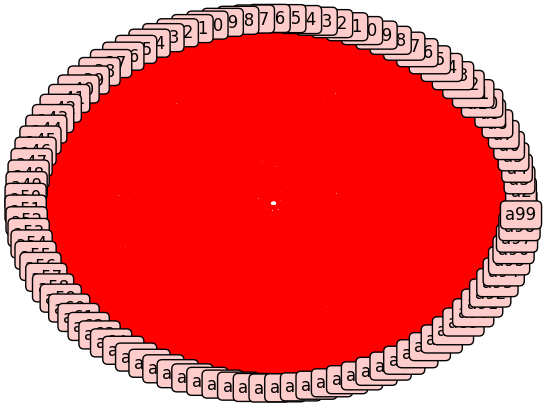

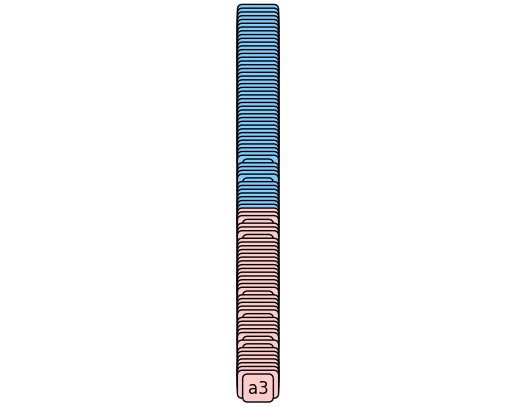

TOPSIS Scores and Ranks:
           TOPSIS_Score  TOPSIS_Rank
Marque                              
Toyota         0.556895         57.0
Honda          0.614557          6.0
Ford           0.424202         96.0
Chevrolet      0.442034         91.0
Hyundai        0.566758         49.0
...                 ...          ...
Jaguar         0.582354         35.0
Tesla          0.601796         16.0
Porsche        0.599259         24.0
Volvo          0.584204         32.0
Ferrari        0.470297         76.0

[99 rows x 2 columns]

ELECTRE I Result:
(array([[1.        , 0.31818182, 0.86363636, ..., 0.36363636, 0.5       ,
        0.45454545],
       [0.68181818, 1.        , 0.86363636, ..., 0.18181818, 0.45454545,
        0.54545455],
       [0.40909091, 0.13636364, 1.        , ..., 0.18181818, 0.09090909,
        0.27272727],
       ...,
       [0.90909091, 0.81818182, 0.90909091, ..., 1.        , 0.90909091,
        0.77272727],
       [0.90909091, 0.81818182, 1.        , ..., 0.36363636, 1.

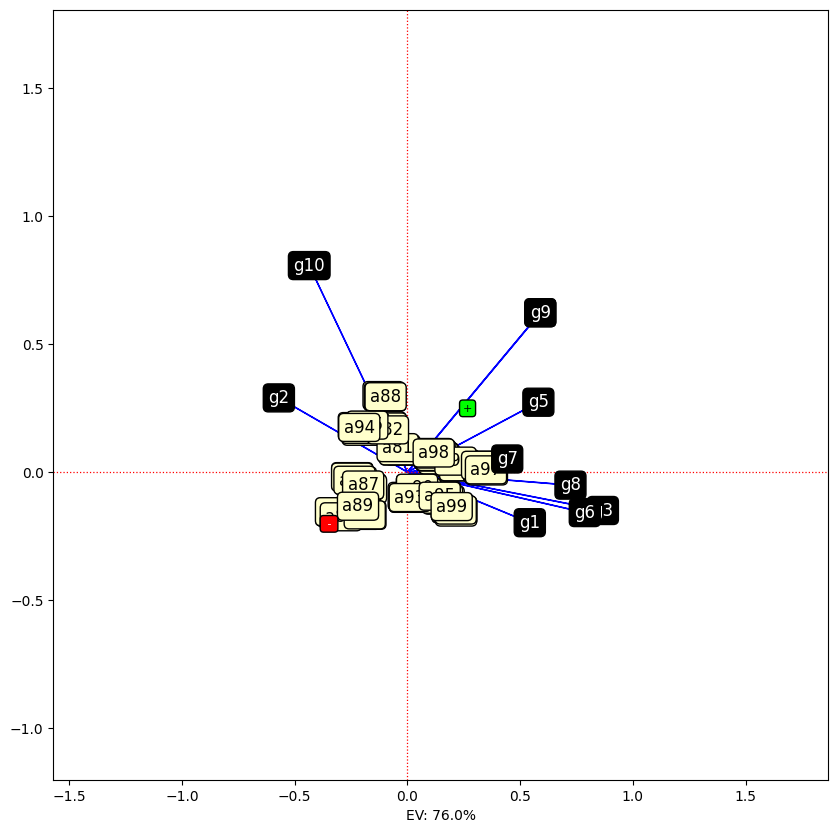

Marques avec le meilleur classement selon PROMETHEE II:
            PROMETHEE II Rank
Marque                       
Volvo                       1
Honda                       2
Ferrari                     3
Audi                        4
Honda                       5
Porsche                     6
Ford                        7
Volkswagen                  8
Kia                         9
Audi                       10
Marques avec le meilleur classement selon TOPSIS:
          TOPSIS_Rank
Marque               
Honda             1.0
Tesla             2.0
Honda             3.0
Tesla             4.0
Mercedes          5.0
Honda             6.0
Mercedes          7.0
Mercedes          8.0
Honda             9.0
Subaru           10.0


In [2]:
import pandas as pd
import numpy as np
from pyDecision.algorithm import electre_i, promethee_i, promethee_ii, promethee_gaia, topsis_method
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df = pd.read_csv('./cars.csv')

print("Aperçu des données chargées :")
print(df.head())

if 'Marque' in df.columns:
    df.set_index('Marque', inplace=True)


# Encodage de la colonne 'Transmission'
label_encoder = LabelEncoder()
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])


# Définir les critères et les poids
criteria = ['Prix', 'Consommation', 'Performances', 'Fiabilité', 'Confort', 'Design', 'Espace Intérieur', 'Technologie', 'Sécurité', 'Transmission']
weights = [0.15, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
criterion_type = ['min', 'min', 'max', 'max', 'max', 'max', 'max', 'max', 'max', 'max']

df.drop(columns=['ID'], inplace=True)

# print(df.columns)


# Vérification de la forme des données et des poids
assert len(criteria) == df.shape[1], "Le nombre de critères doit correspondre au nombre de colonnes (hors 'Marque')."
assert len(weights) == df.shape[1], "Le nombre de poids doit correspondre au nombre de colonnes (hors 'Marque')."

# Normalisation des données
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
print('Normalisation des données:')
print(normalized_df.head())


# TOPSIS
topsis_result = topsis_method(normalized_df.values, weights, criterion_type)
df['TOPSIS_Score'] = topsis_result
df['TOPSIS_Rank'] = df['TOPSIS_Score'].rank(ascending=False)

# ELECTRE I
concordance_threshold = 0.6
discordance_threshold = 0.4
electre_result = electre_i(normalized_df.values, weights, criterion_type, concordance_threshold, discordance_threshold)

# PROMETHEE I et II
Q = [0.1] * len(criteria)  # preference_thresholds
S = [0.2] * len(criteria)  # indifference_thresholds
P = [0.3] * len(criteria)  # preference_inverse_thresholds
F = [0.0] * len(criteria)  # veto_thresholds

promethee_i_result = promethee_i(normalized_df.values, weights, criterion_type, Q, S, P, F)
promethee_ii_result = promethee_ii(normalized_df.values, weights, criterion_type, Q, S, P, F, graph=True, verbose=True)
promethee_ii_res = [int(sub_array[0]) for sub_array in promethee_ii_result]

# Affichage des résultats
print("TOPSIS Scores and Ranks:")
print(df[['TOPSIS_Score', 'TOPSIS_Rank']])
print("\nELECTRE I Result:")
print(electre_result)
print("\nPROMETHEE I Result:")
print(promethee_i_result)
print("\nPROMETHEE II Result:")
print(promethee_ii_result)

# GAIA

gaia_result = promethee_gaia(normalized_df.values, weights, Q, S, P, F)


# Combiner les résultats avec les données originales
df['PROMETHEE II Rank'] = promethee_ii_res

# Afficher la marque avec le meilleur classement PROMETHEE II
print("Marques avec le meilleur classement selon PROMETHEE II:")
print(df.sort_values(by='PROMETHEE II Rank')[['PROMETHEE II Rank']].head(10))


# Afficher la marque avec le meilleur classement TOPSIS
print("Marques avec le meilleur classement selon TOPSIS:")
print(df.sort_values(by='TOPSIS_Rank')[['TOPSIS_Rank']].head(10))
